# Data Project - Anna, Signe og Klara

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [18]:
import pandas as pd
#%pip install matplotlib-venn
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('Data/')
assert os.path.isfile('Data/BIO5.xlsx')

# Print everything in data
os.listdir('Data/')

['BIO5.xlsx']

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [20]:
filename = 'Data/BIO5.xlsx' # open the file and have a look at it
bio = pd.read_excel(filename, skiprows=2)
bio.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Årets premierefilm,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,NaN,NaN,NaN,NaN,"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,NaN,NaN,NaN,NaN,Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,NaN,NaN,NaN,NaN,"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,NaN,NaN,NaN,NaN,"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0


In [21]:
#filling out the NaN values in the columns
bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')

bio.head(10)

C:\Users\annaf\AppData\Local\Temp\ipykernel_12484\3814874326.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 1'] = bio['Unnamed: 1'].fillna(method='ffill')
C:\Users\annaf\AppData\Local\Temp\ipykernel_12484\3814874326.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 2'] = bio['Unnamed: 2'].fillna(method='ffill')
C:\Users\annaf\AppData\Local\Temp\ipykernel_12484\3814874326.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bio['Unnamed: 3'] = bio['Unnamed: 3'].fillna(method='ffill')


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Årets premierefilm,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
5,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,17.0,41.0,88.0,131.0,72.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
6,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",38.0,35.0,32.0,33.0,33.0,...,31.0,35.0,36.0,36.0,37.0,27.0,22.0,18.0,33.0,34.0
9,NaN,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",28.0,30.0,27.0,23.0,24.0,...,25.0,27.0,27.0,30.0,26.0,23.0,20.0,14.0,30.0,30.0


In [22]:
# These columns have to go: 'Unnamed: 0'
drop_these = ['Unnamed: 0'] # use list comprehension to create list of columns
print(drop_these)

bio.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
bio.rename(columns = {'Unnamed: 1':'Country'}, inplace=True)
bio.rename(columns = {'Unnamed: 2':'Censorship'}, inplace=True)
bio.rename(columns = {'Unnamed: 3':'Type'}, inplace=True)
bio.rename(columns = {'Unnamed: 4':'Cinema_movies'}, inplace=True)
bio.head(10)

['Unnamed: 0']


,Country,Censorship,Type,Cinema_movies,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,3821.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,3775.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,2700.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,1076.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,46.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
5,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,17.0,41.0,88.0,131.0,72.0,46.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
6,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",38.0,35.0,32.0,33.0,33.0,30.0,...,31.0,35.0,36.0,36.0,37.0,27.0,22.0,18.0,33.0,34.0
9,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",28.0,30.0,27.0,23.0,24.0,20.0,...,25.0,27.0,27.0,30.0,26.0,23.0,20.0,14.0,30.0,30.0


In [23]:
#naming the columns
col_dict = {}
for i in range(2007, 2023+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'bio{i}'

col_dict = {str(i) : f'bio{i}' for i in range(2007,2023+1)}
col_dict

bio.rename(columns = col_dict, inplace=True)
bio.head(10)

,Country,Censorship,Type,Cinema_movies,bio2007,bio2008,bio2009,bio2010,bio2011,bio2012,...,bio2014,bio2015,bio2016,bio2017,bio2018,bio2019,bio2020,bio2021,bio2022,bio2023
0,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm og dokumentarfilm, alle målgrupper",2901.0,4107.0,2268.0,2810.0,2860.0,3821.0,...,3184.0,3710.0,2522.0,2470.0,3481.0,2611.0,3476.0,2464.0,2943.0,2468.0
1,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, alle målgrupper",2883.0,4066.0,2180.0,2679.0,2788.0,3775.0,...,3159.0,3690.0,2504.0,2433.0,3445.0,2591.0,3471.0,2436.0,2931.0,2449.0
2,Danmark,Alle censurforhold,Solgte billetter (1.000),Spillefilm. voksne,1010.0,1875.0,1455.0,1465.0,1883.0,2700.0,...,2322.0,2443.0,2089.0,1657.0,2341.0,2250.0,2902.0,1314.0,2186.0,2210.0
3,Danmark,Alle censurforhold,Solgte billetter (1.000),"Spillefilm, børn/unge/familie",1873.0,2191.0,725.0,1214.0,905.0,1076.0,...,836.0,1247.0,415.0,776.0,1105.0,342.0,570.0,1122.0,745.0,239.0
4,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, alle målgrupper",17.0,41.0,88.0,131.0,72.0,46.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
5,Danmark,Alle censurforhold,Solgte billetter (1.000),Dokumentarfilm voksne,17.0,41.0,88.0,131.0,72.0,46.0,...,25.0,20.0,18.0,37.0,36.0,20.0,5.0,28.0,11.0,19.0
6,Danmark,Alle censurforhold,Solgte billetter (1.000),"Dokumentarfilm, børn/unge/familie",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Danmark,Alle censurforhold,Solgte billetter (1.000),Uoplyst,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Danmark,Alle censurforhold,Film (antal),"Spillefilm og dokumentarfilm, alle målgrupper",38.0,35.0,32.0,33.0,33.0,30.0,...,31.0,35.0,36.0,36.0,37.0,27.0,22.0,18.0,33.0,34.0
9,Danmark,Alle censurforhold,Film (antal),"Spillefilm, alle målgrupper",28.0,30.0,27.0,23.0,24.0,20.0,...,25.0,27.0,27.0,30.0,26.0,23.0,20.0,14.0,30.0,30.0


## Exploring the data set

Firstly, we want to explore the dataset a bit further. We focus on movies in Denmark, the US and the EU, and look at the development in the number of movies and the number of sold tickets. 

In [36]:
selected_countries = ['Danmark', 'USA', 'EU-28 udenfor Danmark']
selected_censorship = 'Alle censurforhold'
selected_type = 'Film (antal)'
selected_cinema_movies = 'Spillefilm og dokumentarfilm, alle målgrupper'

filtered_bio = bio[(bio['Country'].isin(selected_countries)) & 
                   (bio['Censorship'] == selected_censorship) & 
                   (bio['Type'] == selected_type) &
                   (bio['Cinema_movies'] == selected_cinema_movies)]

filtered_bio 
filtered_bio.groupby('Country').describe()



bio2007                                                \
                        count   mean std    min    25%    50%    75%    max   
Country                                                                       
Danmark                   1.0   38.0 NaN   38.0   38.0   38.0   38.0   38.0   
EU-28 udenfor Danmark     1.0    0.0 NaN    0.0    0.0    0.0    0.0    0.0   
USA                       1.0  107.0 NaN  107.0  107.0  107.0  107.0  107.0   

                      bio2008         ... bio2022       bio2023            \
                        count   mean  ...     75%   max   count  mean std   
Country                               ...                                   
Danmark                   1.0   35.0  ...    33.0  33.0     1.0  34.0 NaN   
EU-28 udenfor Danmark     1.0    0.0  ...    66.0  66.0     1.0  69.0 NaN   
USA                       1.0  106.0  ...    82.0  82.0     1.0  93.0 NaN   

                                                     
                        min   25%   50%   75%   max  
Country                                              
Danmark                34.0  34.0  34.0  34.0  34.0  
EU-28 udenfor Danmark  69.0  69.0  69.0  69.0  69.0  
USA                    93.0  93.0  93.0  93.0  93.0  

[3 rows x 136 columns]

Next, we plot two figures: The number of movies and the number of sold tickets across selected countries/areas. 

In [12]:
#plotting movies across countries and years
def plot_bio(land):
    bio_land = bio[bio['Land'] == land]
    bio_land = bio_land.drop(columns=['Land', 'Censurforhold', 'Type(antal)'])
    bio_land = bio_land.set_index('Biograffilm')
    bio_land = bio_land.T
    bio_land.plot(title=land)
    plt.show()

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

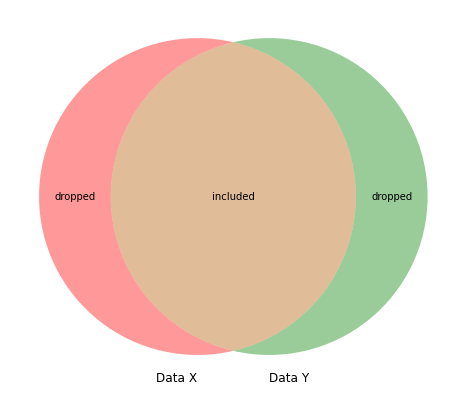

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

This is our conclusion. It is a nice conclusion.

nej nej 